# Neuroscientific data analysis in Python Winter Semester 2023/2024
## Assignment – Week 2 - Spike detection

Please upload your solution until Tuesday 31.10.23, end of the day (23.59 p.m.) to the folder `assignment uploads/assignment 2` in Stud.IP! 

__Important:__ Please replace ‘FullName` in the file name with your own full (first and last) name when saving and uploading the file!

The goal of this assignment is to determine the time and the peak voltage of spikes in a recording.

### Files:
Please download all files in the folder. The data file `voltage_traces.txt` should be in the same folder as this notebook.

Spikes are one of the major ways by which neurons communicate and both the amount and the timing of spikes matters. To understand the function of neuronal networks, we can therefore often reduce neuronal responses to a list of spike times.

Hence, the detection of spikes in recordings of neuronal activity is a frequent first step of neuronal data analysis. 

You have now all the ingredients to solve that problem for the example of intracellular recordings. These data are highly simplified, since spikes only last a single sample - simple threshold of the voltage trace is therefore sufficient to detect spikes. More realistic spikes last a bit longer, and therefore require more sophisticated approaches for their detection.

In this assignment you will write a function that detects spikes in different trials of an experiment.

This will be a challenging assignment - see how far you can get!

More details below, but to give you a quick overview:
- Load the data using the function `load_voltage_data` in `data_utils.py`.
- First, plot the data to make sure you understand the data structure returned by that function
- Second, write code in a notebook cell to detect the spikes and their voltages in the first trial (trial #0). Plot the voltage traces and overlay the spike times and voltages, like so:
![](assignment_week2_example.png)
- Third, turn your code into a function, and save it to an external file. Document the functions in the file properly (inputs, outputs, what does it do)
- Fourth and last, import the function from the external file and detect and plot spikes for the first 10 trials of the experiment.
- Comment your code!!

In [1]:
import matplotlib.pyplot as plt
import numpy as np

### 1. Load and plot the voltage trace for one trial

We have written code for loading the data in the function `load_voltage_data` in `data_utils.py`. To use it, you need to import the function. Learn about how to use the function - the inputs and outputs - using the `help` function.

The voltage is sampled with a bin duration of 1 ms - one voltage value per millisecond, which corresponds to 1 kHz.

Plot the voltage trace from the first trial (trial number 0) with the correct time axis (in seconds):

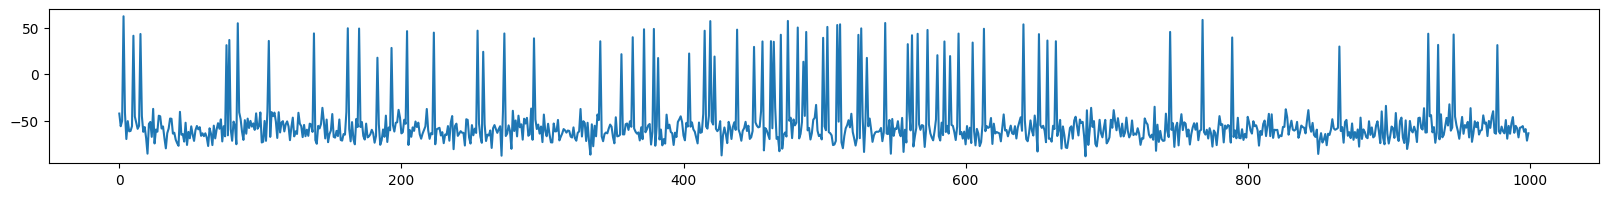

In [2]:
# your solution here
from data_utils import load_voltage_data 
plt.figure(figsize=(20, 2))
plt.plot (load_voltage_data(0))

### 2. Detect the spikes in the voltage traces
We'd like to know:
1. the total number of spikes
2. the voltage values of all the spikes as a list
3. the time (in seconds, not the index) of all the spikes as a list

We define spikes as all voltage values that exceed a threshold of 0V.
This works for this simple example. For real data, we need more complicated criteria (next week!).

Write code that uses for loops and if statements to compute this information:

In [5]:
# your solution here

firstrialspikes=[]
timeofspike=[]
threshold=0.0
for idx,val in enumerate(load_voltage_data(0)):
    if val > threshold:
        firstrialspikes.append(val)
        timeofspike.append(idx/len(load_voltage_data(0)))

print(f"1.The count of first trial's spikes: -> {len(firstrialspikes)}")
print(f"2.All spikes'voltage values: -> {(firstrialspikes)}")
print(f"3.Times of all spikes: -> {(timeofspike)}")

1.The count of first trial's spikes: -> 68
2.All spikes'voltage values: -> [62.41, 41.44, 43.34, 31.29, 36.88, 54.88, 35.86, 43.96, 49.49, 49.21, 17.77, 28.32, 46.4, 44.81, 46.92, 24.17, 43.9, 38.64, 35.47, 21.57, 39.84, 48.42, 48.8, 17.44, 22.31, 46.85, 57.2, 19.05, 48.01, 29.45, 35.31, 35.61, 34.97, 42.51, 57.39, 50.29, 13.44, 45.53, 39.22, 50.96, 53.01, 53.75, 42.42, 49.37, 17.6, 55.18, 32.38, 41.95, 43.55, 47.68, 20.48, 35.29, 19.54, 43.79, 34.1, 48.96, 53.68, 43.17, 36.29, 35.52, 45.56, 58.5, 39.59, 29.83, 43.64, 31.6, 42.76, 31.36]
3.Times of all spikes: -> [0.003, 0.01, 0.015, 0.076, 0.078, 0.084, 0.106, 0.138, 0.162, 0.17, 0.183, 0.193, 0.204, 0.223, 0.254, 0.258, 0.273, 0.294, 0.341, 0.356, 0.364, 0.372, 0.379, 0.382, 0.404, 0.415, 0.419, 0.422, 0.438, 0.45, 0.456, 0.462, 0.464, 0.469, 0.474, 0.481, 0.485, 0.487, 0.499, 0.502, 0.509, 0.511, 0.524, 0.526, 0.53, 0.543, 0.559, 0.562, 0.566, 0.573, 0.58, 0.585, 0.589, 0.595, 0.605, 0.613, 0.641, 0.652, 0.658, 0.664, 0.745, 0.768, 

Plot the voltage traces with the detected spikes.

Plot the voltage trace and, on top of the trace, overlay the peak of each spike with a translucent dot. 
The plot title should indicate the trial and the number of detected spikes. Roughly like so:

![](assignment_2_example.png)

Did your code detect all 68 spikes in the first trial?

In [4]:
# your solution here

tiseconds=[]
for idxd,vald in enumerate(load_voltage_data(0)):
    tiseconds.append(idxd/len(load_voltage_data(0)))

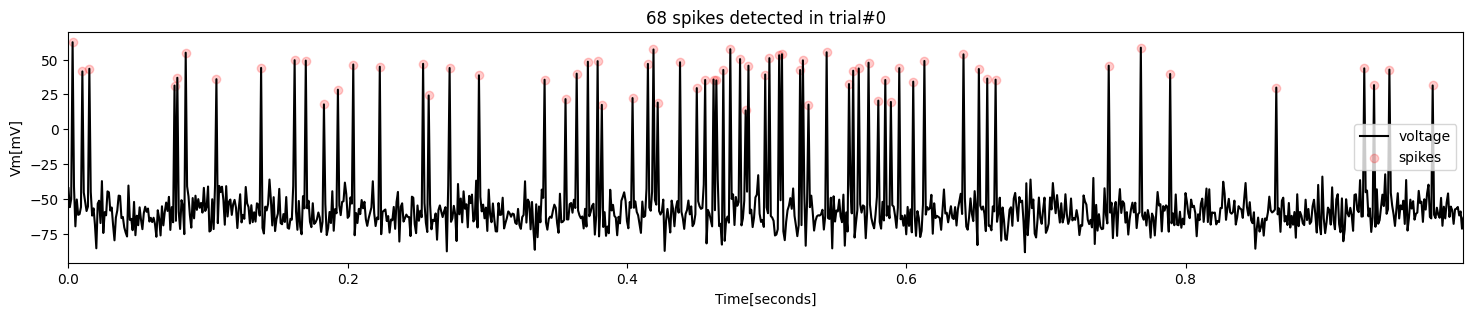

In [6]:
plt.figure(figsize=(18, 3))
trial_number = 0
plt.plot(tiseconds,load_voltage_data(trial_number),'k', label='voltage')
plt.scatter(timeofspike,firstrialspikes,c='r',alpha=0.2, label='spikes')
plt.title(f"{len(firstrialspikes)} spikes detected in trial#{trial_number}")
plt.xlim(tiseconds[0],tiseconds[-1])
plt.xlabel('Time[seconds]')
plt.ylabel('Vm[mV]')
plt.legend()


### 3. Turn your code into a function and use the functions to detect and plot the spikes for the second trial.
Your function for spike detection should have the following name, inputs (arguments), and outputs (returns):
- name: detect_spikes
- arguments:
    - voltage (the recording)
    - time (time (in seconds) for each value in recording)
    - threshhold (voltage threshold for detecting spikes) 
- returns: 
    - spike_voltages (in mV)
    - spike_times (in seconds)

Document the function poperly - the arguments, the return values. Add a brief section with a description of the algorithm, so people know whether the code is appropriate for their data or definition of a spike.

Additionally, make a function that plots the voltage trace and the spikes with the following specification:
- name: plot_spikes
- arguments:
    - voltage (the recording)
    - time (time (in seconds) for each value in recording)
    - spike_voltages (voltage values at which spikes occurred)
    - spike_times (time (in seconds) at which spikes occurred )

Save the two functions - for spike detection and for plotting - to an external file.

Import the code from the external file and use it to detect and plot the spikes for the second trial.

__Hint:__ In the external file, you need to import everything you want to use, for instance, pyplot, even if you already imported it in the notebook.


Now use the functions to load the voltage data for the second trial, detect the spike times and voltages, and plot them:

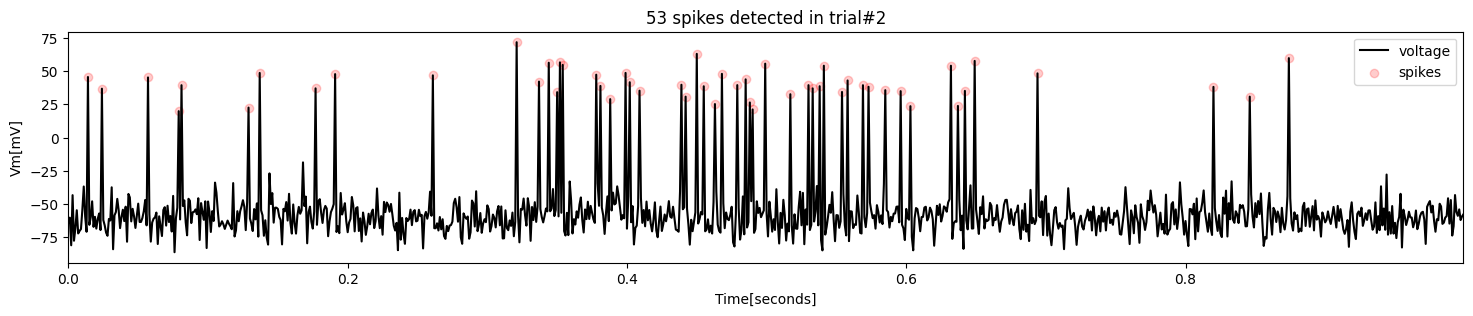

In [8]:
import matplotlib.pyplot as plt
from data_utils import load_voltage_data
threshold=0.0
trial_number=2
recording=load_voltage_data(trial_number)
timeseconds = [idxt / len(recording) for idxt in range(len(recording))]


def detect_spikes(recording,timeseconds,threshold):
    '''
    Detect spikes in a recording.

    Arguments:
    - voltage: the recording (voltage values)
    - time: time (in seconds) for each value in recording
    - threshold: voltage threshold for detecting spikes

    Returns:
    - spike_voltages: voltage values at which spikes occurred
    - spike_times: time (in seconds) at which spikes occurred
    '''
    spike_voltages=[]
    timeofspike=[]
    for idx,val in enumerate(recording):
        if val > threshold:
            spike_voltages.append(val)
            timeofspike.append(timeseconds[idx])
    return timeofspike,spike_voltages

timeofspike, spike_voltages = detect_spikes(recording, timeseconds, threshold)

def plot_spikes(recording,timeseconds,spike_voltages,timeofspike):
    """
    Plot the voltage trace and spikes.

    Arguments:
    - voltage: the recording (voltage values)
    - time: time (in seconds) for each value in recording
    - spike_voltages: voltage values at which spikes occurred
    - spike_times: time (in seconds) at which spikes occurred
    """
    plt.figure(figsize=(18, 3))
    plt.plot(timeseconds,recording,'k', label='voltage')
    plt.scatter(timeofspike,spike_voltages,c='r',alpha=0.2, label='spikes')
    plt.title(f"{len(spike_voltages)} spikes detected in trial#{trial_number}")
    plt.xlim(timeseconds[0],timeseconds[-1])
    plt.xlabel('Time[seconds]')
    plt.ylabel('Vm[mV]')
    plt.legend()

plot_spikes(recording,timeseconds,spike_voltages,timeofspike)
     


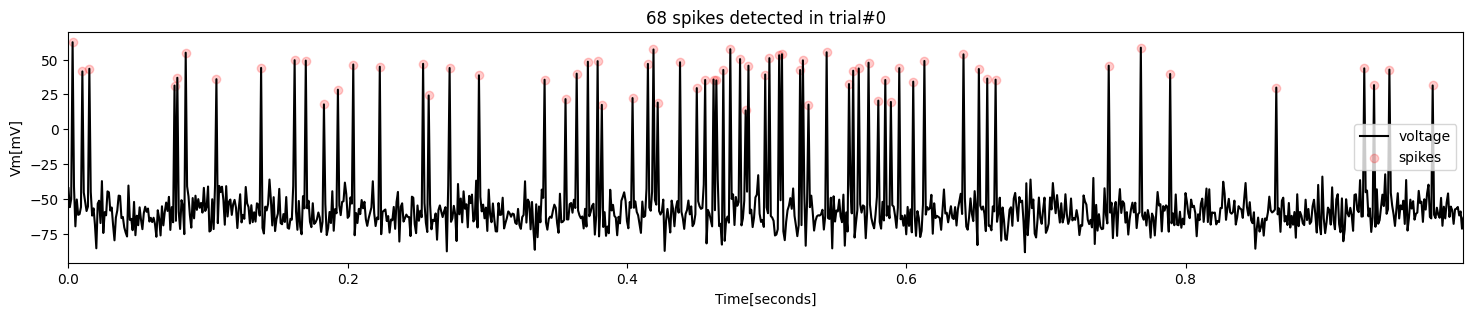

In [4]:
import matplotlib.pyplot as plt
from data_utils import load_voltage_data
from spikedetector import plot_spikes
from spikedetector import detect_spikes
threshold=0.0
trial_number=0
recording=load_voltage_data(trial_number)
timeseconds = [idxt / len(recording) for idxt in range(len(recording))]
timeofspike, spike_voltages = detect_spikes(recording, timeseconds, threshold)

plot_spikes(recording,timeseconds,spike_voltages,timeofspike,trial_number)
# plt.title(f"{len(spike_voltages)} spikes detected in trial#{trial_number}")



### 4. Use a for loop to detect the spikes for the first 10 trials
In the for loop:
1. load data for the current trial
2. detect the spikes using your function saved to an external file
3. plot the voltage trace for the current trial and overlay the spikes (you can turn the code for plotting into a separate function)

The plots should be properly labelled etc. The plot title should indicate the trial and the number of spikes detected in that trial.
You should get a series of 10 plots, one for each of the first 10 trials.

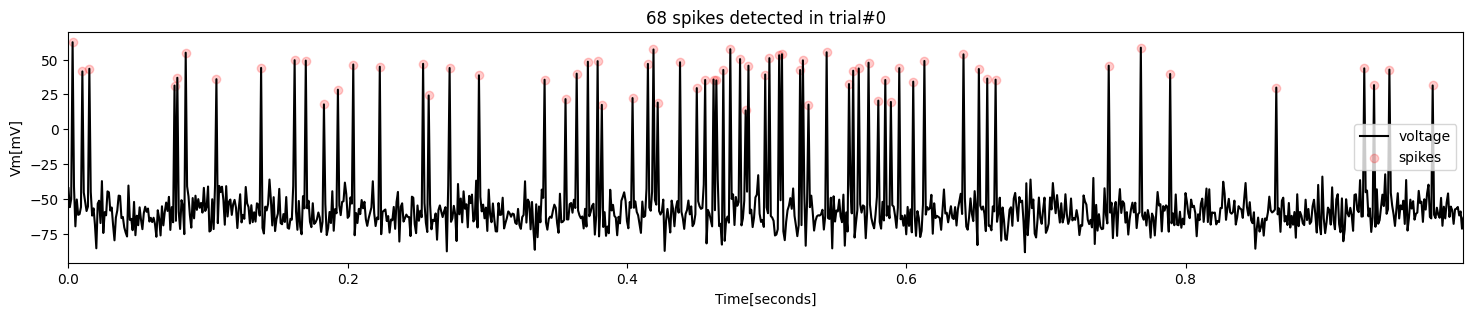

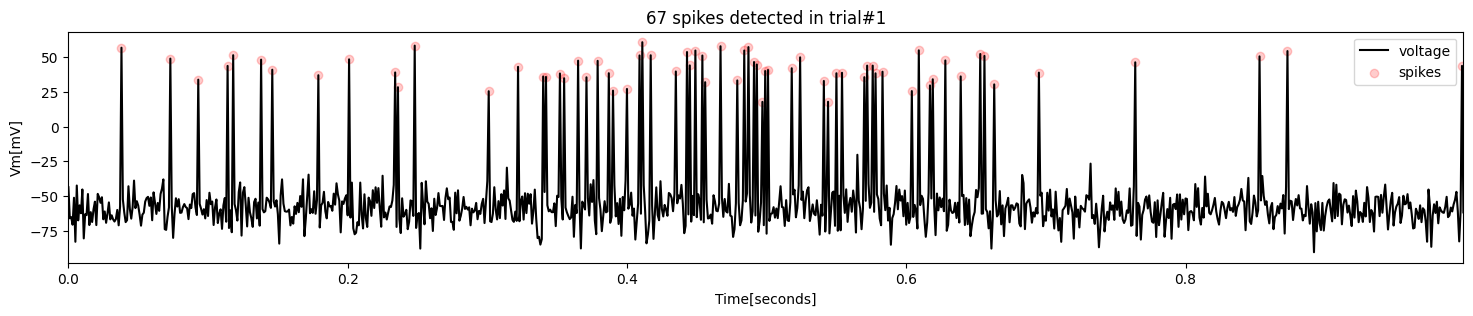

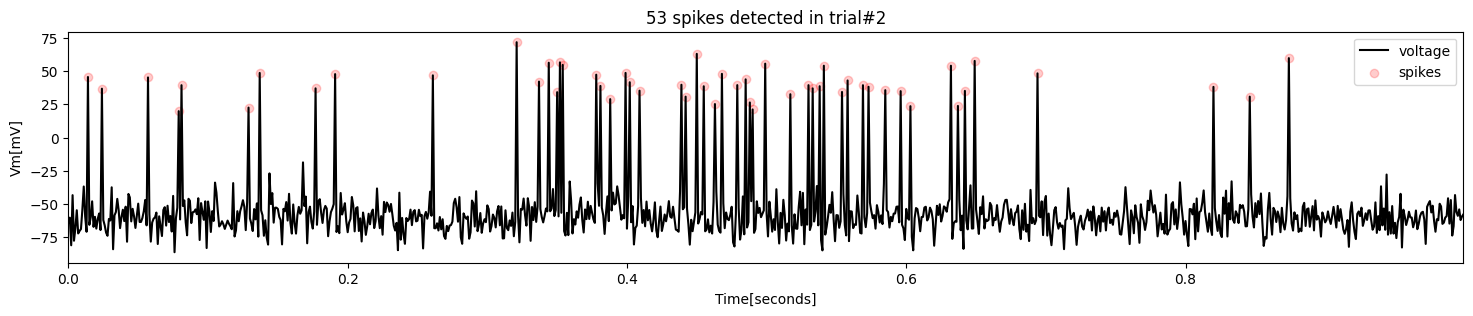

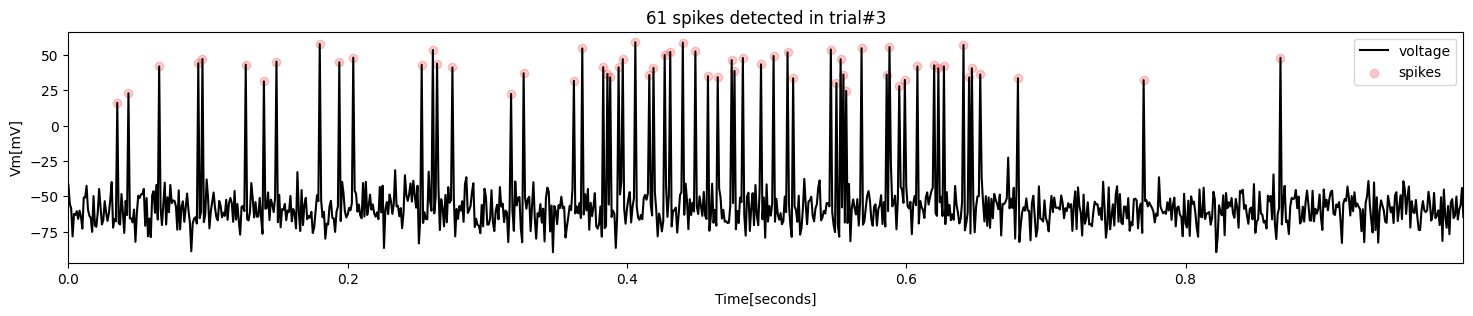

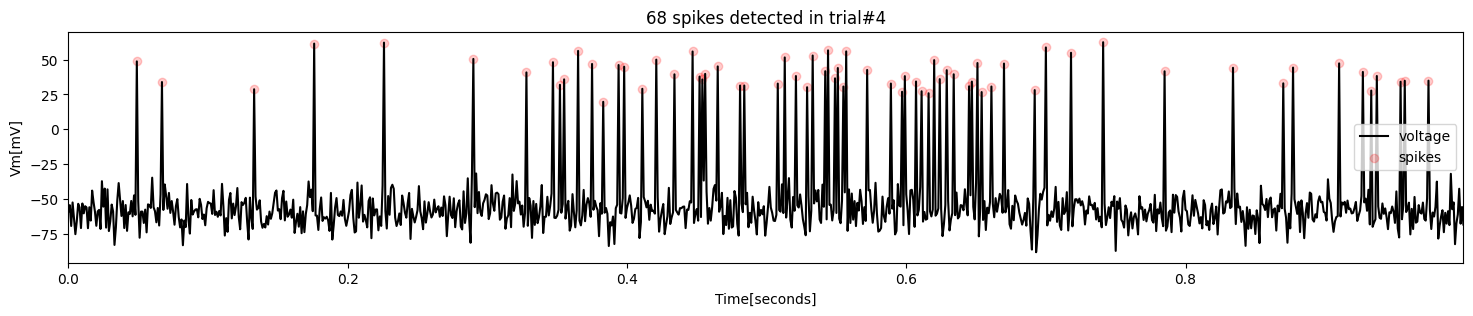

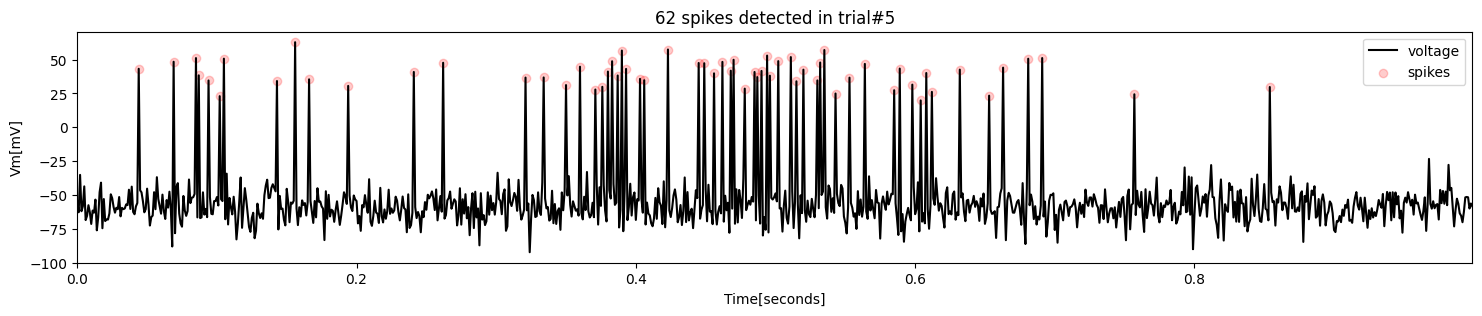

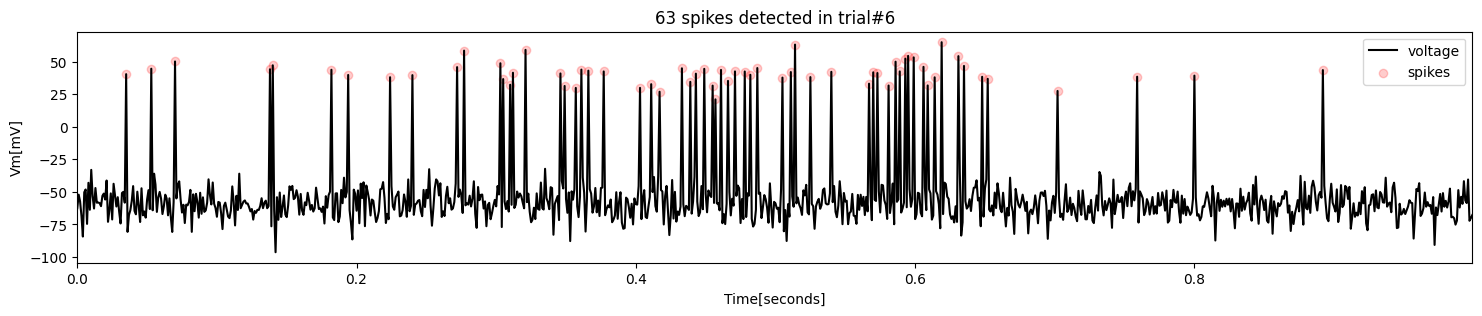

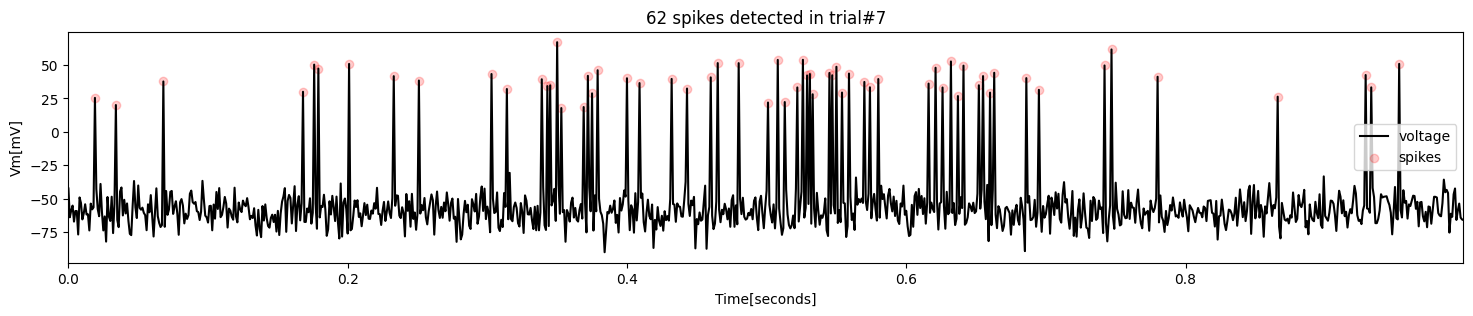

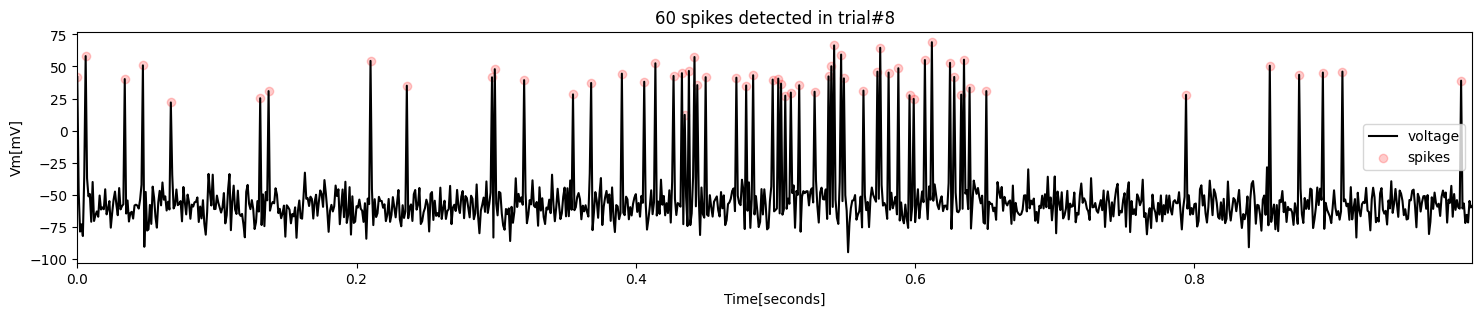

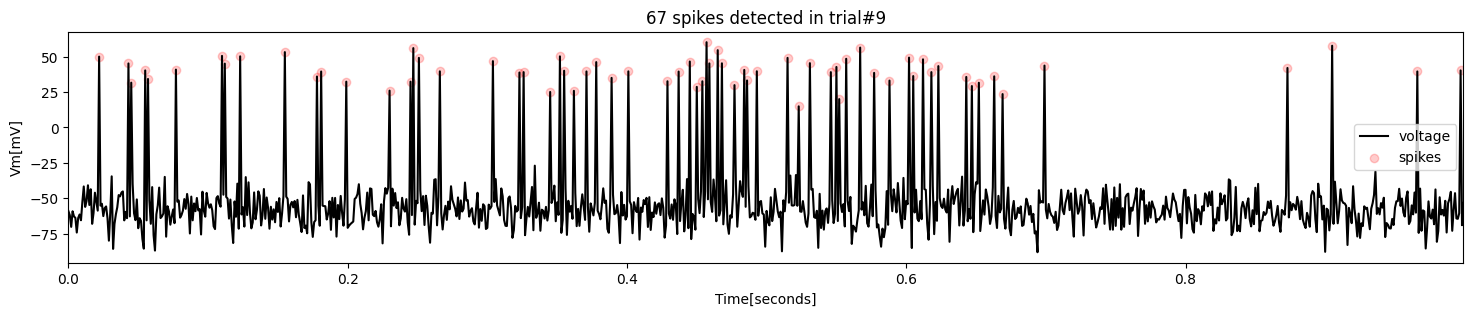

In [3]:
import matplotlib.pyplot as plt
from data_utils import load_voltage_data
from spikedetector import plot_spikes
from spikedetector import detect_spikes

threshold = 0.0
for trial_number in range(0, 10):
    recording = load_voltage_data(trial_number)
    timeseconds = [idxt / len(recording) for idxt in range(len(recording))]
    timeofspike, spike_voltages = detect_spikes(recording, timeseconds, threshold)

    timeofspike, spike_voltages = detect_spikes(recording, timeseconds, threshold)
    plot_spikes(recording, timeseconds, spike_voltages, timeofspike,trial_number)
